### *shree ganeshaya namaha*

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
import pandas as pd

# Load UFO data
df = pd.read_csv('/content/drive/MyDrive/UFO/nuforc_india.csv', encoding='ISO-8859-1')
df.head()


Link          Occurred      City        State Country     Shape  \
0  Open  04-09-2025 18:01    Howrah  West Bengal   India    Circle   
1  Open  04-05-2025 22:15  Dindigul   Tamil Nadu   India    Circle   
2  Open  03/18/2025 20:06  Haridwar  Uttarakhand   India  Triangle   
3  Open  03/18/2025 05:00    Ranchi    Jharkhand   India      Disk   
4  Open  03-11-2025 19:17  Gurugram      Haryana   India    Circle   

                                             Summary    Reported Media  \
0  Seen from the window of a flat on the fourth f...  04-09-2025   NaN   
1              Strange Circle of Lights in Night Sky  04-05-2025     Y   
2  Saw a silent, transparent/black triangular cra...  03/18/2025   NaN   
3  I was waiting for my father when i saw a disk ...  03/18/2025   NaN   
4                                        Glowing Orb  03-11-2025     Y   

   Explanation  
0          NaN  
1  Searchlight  
2          NaN  
3          NaN  
4          ISS

In [ ]:
# Preprocessing the description text
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['cleaned_description'] = df['Summary'].apply(clean_text)
df[['Summary', 'cleaned_description']].head()

Summary  \
0  Seen from the window of a flat on the fourth f...   
1              Strange Circle of Lights in Night Sky   
2  Saw a silent, transparent/black triangular cra...   
3  I was waiting for my father when i saw a disk ...   
4                                        Glowing Orb   

                                 cleaned_description  
0  seen from the window of a flat on the fourth f...  
1              strange circle of lights in night sky  
2  saw a silent transparentblack triangular craft...  
3  i was waiting for my father when i saw a disk ...  
4                                        glowing orb

## VADER

In [ ]:
# VADER Sentiment Analysis
# Valence Aware Dictionary for Sentiment Reasoning
!pip install -q vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_analyzer = SentimentIntensityAnalyzer()
df['vader_score'] = df['cleaned_description'].apply(lambda x: vader_analyzer.polarity_scores(x)['compound'])

def vader_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['vader_score'].apply(vader_label)
df[['cleaned_description', 'vader_score', 'vader_sentiment']].head()

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126.0/126.0 kB 3.3 MB/s eta 0:00:00


cleaned_description  vader_score  \
0  seen from the window of a flat on the fourth f...       0.0000   
1              strange circle of lights in night sky      -0.2023   
2  saw a silent transparentblack triangular craft...       0.0000   
3  i was waiting for my father when i saw a disk ...       0.0772   
4                                        glowing orb       0.0000   

  vader_sentiment  
0         neutral  
1        negative  
2         neutral  
3        positive  
4         neutral

<ipython-input-6-be5c4ebe2a18>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='vader_sentiment', palette='Set2', order=['positive', 'neutral', 'negative'])


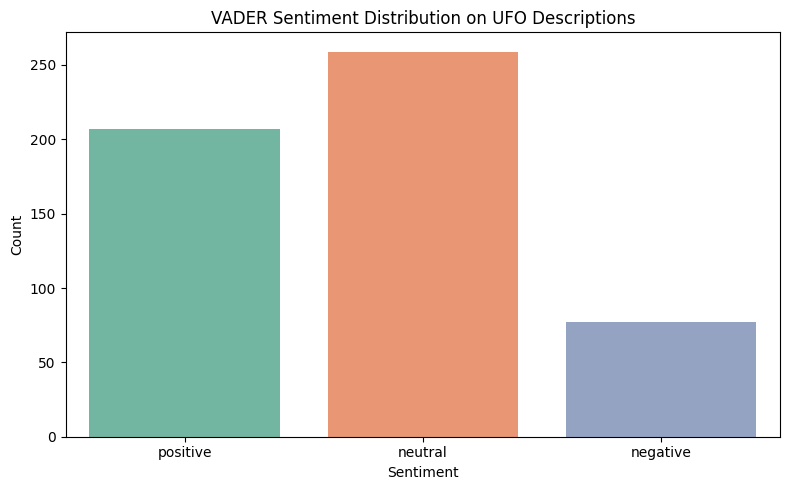

In [ ]:
# Visualize VADER sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='vader_sentiment', palette='Set2', order=['positive', 'neutral', 'negative'])
plt.title('VADER Sentiment Distribution on UFO Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## DistilBERT

### DistilBERT on Whole Dataset

In [ ]:
# running on while dataset
# lighter version of BERT (Bidirectional Encoder Representations from Transformers
# Run on a smaller subset for speed
df['bert_result'] = df['cleaned_description'].apply(lambda x: sentiment_pipeline(x)[0])
df['bert_label'] = df['bert_result'].apply(lambda x: x['label'])
df['bert_score'] = df['bert_result'].apply(lambda x: x['score'])

df[['cleaned_description', 'bert_label', 'bert_score']].head()

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


cleaned_description bert_label  bert_score
0  seen from the window of a flat on the fourth f...   NEGATIVE    0.998033
1              strange circle of lights in night sky   POSITIVE    0.992163
2  saw a silent transparentblack triangular craft...   NEGATIVE    0.999307
3  i was waiting for my father when i saw a disk ...   NEGATIVE    0.999612
4                                        glowing orb   POSITIVE    0.999592

<ipython-input-53-110ac75b60be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bert_label', palette='Set2')


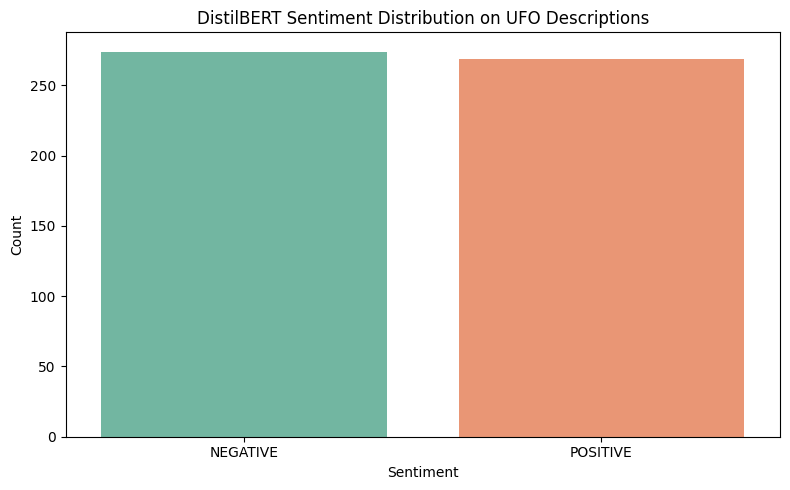

In [ ]:
# Visualize BERT sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='bert_label', palette='Set2')
plt.title('DistilBERT Sentiment Distribution on UFO Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Sentiment vs. Time


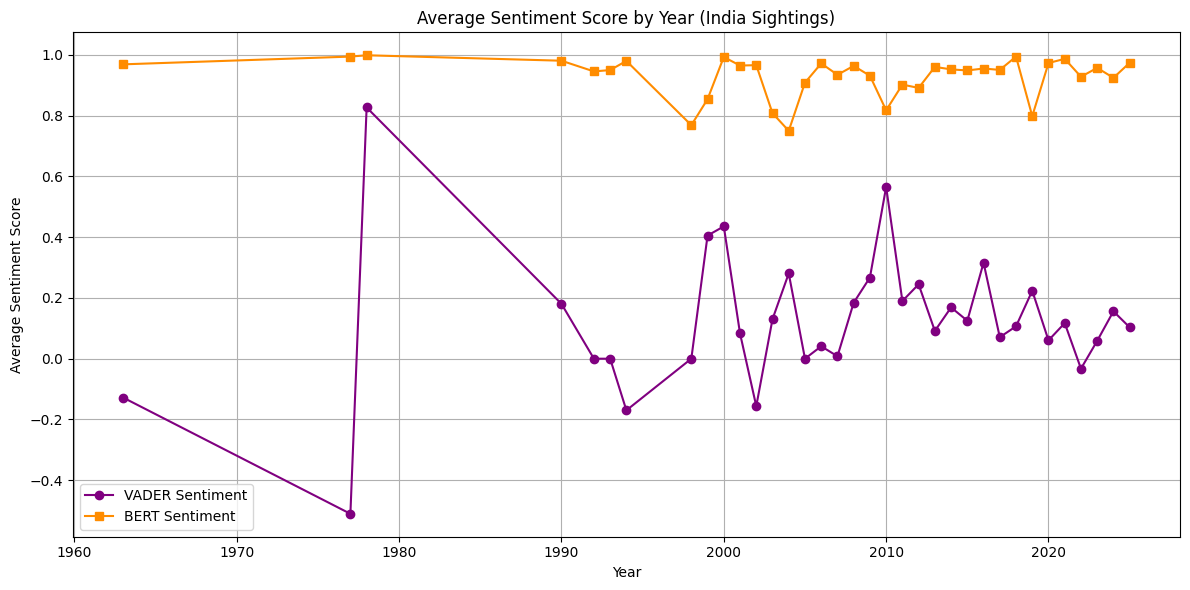

In [ ]:
# Extract year (in case it hasn't been done yet)
df['datetime'] = pd.to_datetime(df['Occurred'], errors='coerce')
df['year'] = df['datetime'].dt.year

# Group by year for both sentiment types
yearly_vader = df.groupby('year')['vader_score'].mean()
yearly_bert = df.groupby('year')['bert_score'].mean()

# Plot both
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(yearly_vader.index, yearly_vader, marker='o', label='VADER Sentiment', color='purple')
plt.plot(yearly_bert.index, yearly_bert, marker='s', label='BERT Sentiment', color='darkorange')

plt.title('Average Sentiment Score by Year (India Sightings)')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Sentiment vs. Location

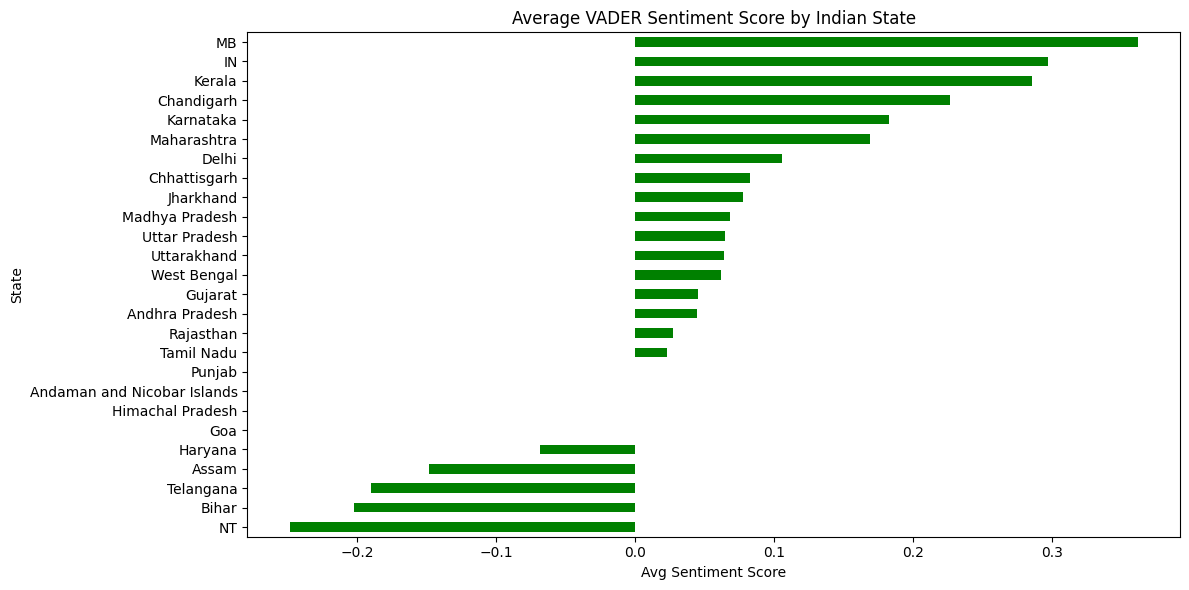

In [ ]:
# Sentiment by US State (for example)
state_sentiment = df.groupby('State')['vader_score'].mean().sort_values()

plt.figure(figsize=(12, 6))
state_sentiment.plot(kind='barh', color='green')
plt.title('Average VADER Sentiment Score by Indian State')
plt.xlabel('Avg Sentiment Score')
plt.ylabel('State')
plt.tight_layout()
plt.show()


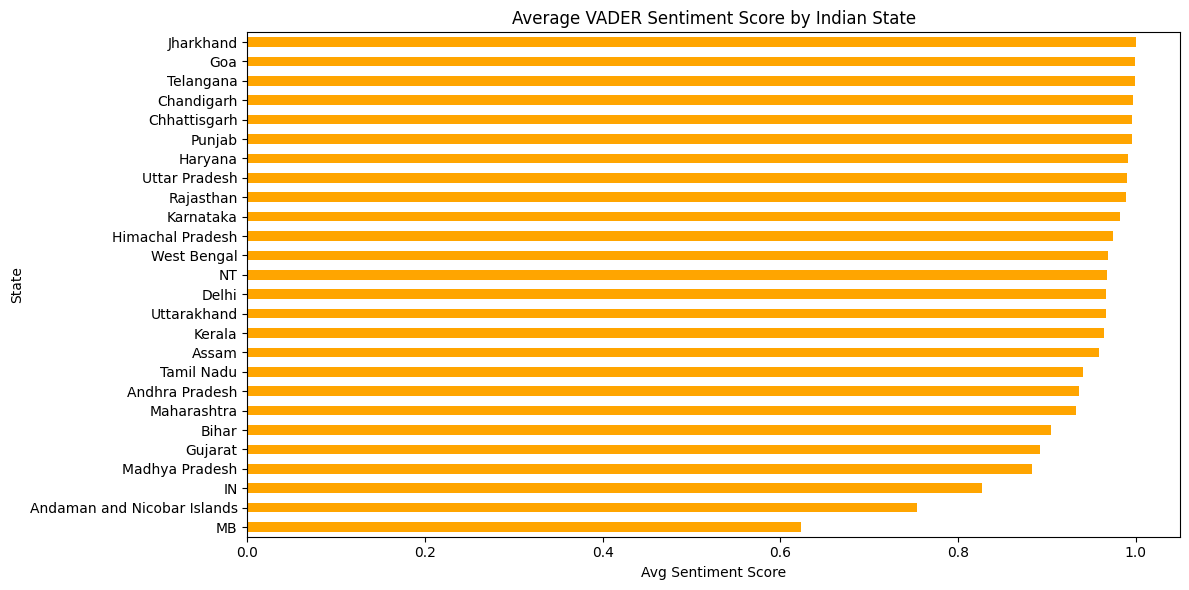

In [ ]:
# Sentiment by US State (for example)
state_sentiment = df.groupby('State')['bert_score'].mean().sort_values()

plt.figure(figsize=(12, 6))
state_sentiment.plot(kind='barh', color='orange')
plt.title('Average VADER Sentiment Score by Indian State')
plt.xlabel('Avg Sentiment Score')
plt.ylabel('State')
plt.tight_layout()
plt.show()


# Advanced Techniques

## 1. Finetuned Transformer Models for Emotion Classification

Model: j-hartmann/emotion-english-distilroberta-base
Output: Multi-class emotion tags like: joy, anger, fear, surprise, disgust, sadness, neutral

In [ ]:
# Emotion Classification with DistilRoBERTa (j-hartmann/emotion)
!pip install -q transformers
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load pipeline
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=False)

# Apply to sampled data
# sampled_df = df.sample(n=1000, random_state=42).copy()
df['hartmann_emotion'] = df['cleaned_description'].apply(lambda x: emotion_classifier(x)[0]['label'])


Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


<ipython-input-20-f47b9d73209c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hartmann_emotion', order=df['hartmann_emotion'].value_counts().index, palette='Set2')


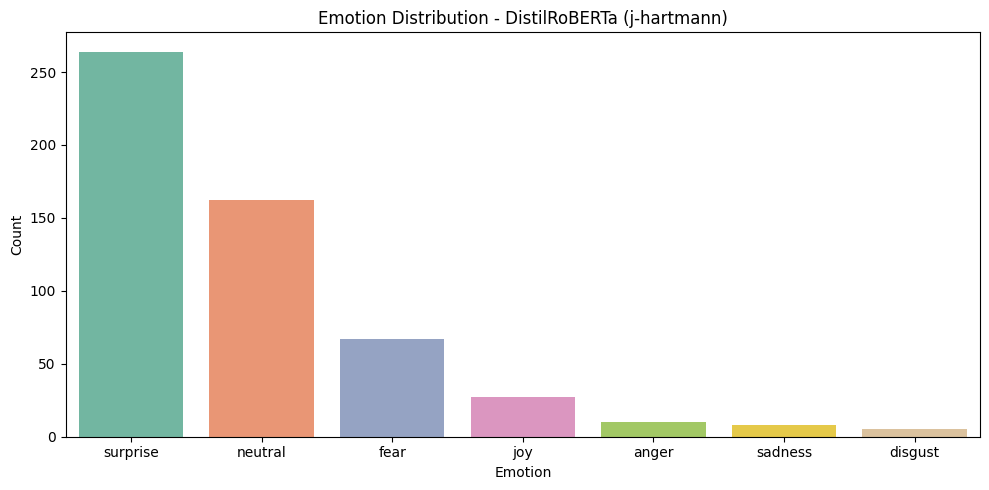

In [ ]:
# Visualization
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='hartmann_emotion', order=df['hartmann_emotion'].value_counts().index, palette='Set2')
plt.title('Emotion Distribution - DistilRoBERTa (j-hartmann)')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 2. Multi-label Sentiment (Positive + Fear + Surprise)
Model: cardiffnlp/twitter-roberta-base-emotion
Trained on tweets but works well on short descriptions.

In [ ]:
# Emotion Classification with CardiffNLP Twitter-RoBERTa
!pip install -q transformers torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

model_name = "cardiffnlp/twitter-roberta-base-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

labels = ['anger', 'joy', 'optimism', 'sadness']

def classify_emotion(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
        scores = torch.nn.functional.softmax(outputs.logits, dim=1)
        return labels[scores.argmax().item()]

df['cardiff_emotion'] = df['cleaned_description'].apply(classify_emotion)



   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 115.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 99.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 48.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

<ipython-input-23-adbf2d2fe528>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cardiff_emotion', order=df['cardiff_emotion'].value_counts().index, palette='Set1')


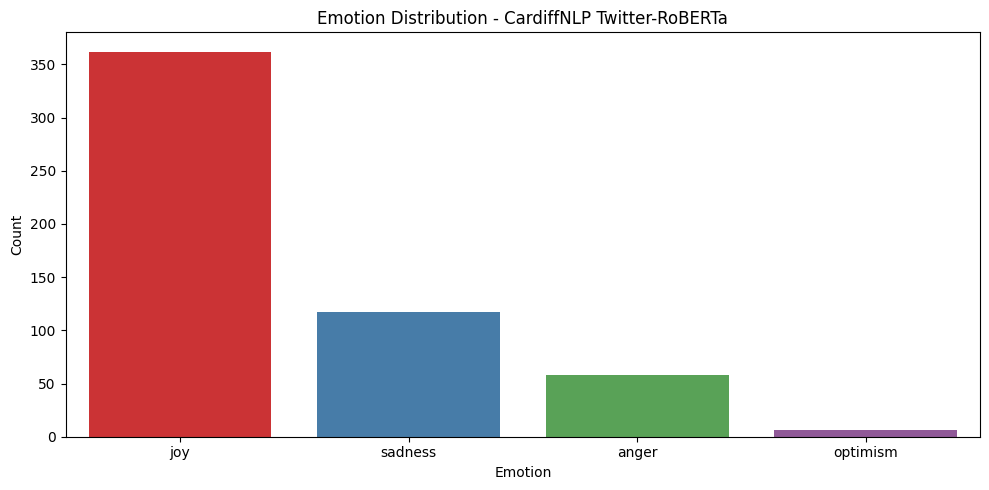

In [ ]:
# Visualization
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cardiff_emotion', order=df['cardiff_emotion'].value_counts().index, palette='Set1')
plt.title('Emotion Distribution - CardiffNLP Twitter-RoBERTa')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 3. Zero-shot Classification for Sentiment/Emotion Themes
If you want custom labels (e.g., fear, confusion, amazement), you can use zero-shot-classification:

In [ ]:
# Zero-shot Classification with Custom Emotion Labels
zero_shot = pipeline("zero-shot-classification")
custom_labels = ["fear", "amazement", "confusion", "excitement", "anger", "indifference"]

df['zero_shot_emotion'] = df['cleaned_description'].apply(
    lambda x: zero_shot(x, candidate_labels=custom_labels)['labels'][0]
)


No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


<ipython-input-25-d66d798d01d3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='zero_shot_emotion', order=df['zero_shot_emotion'].value_counts().index, palette='coolwarm')


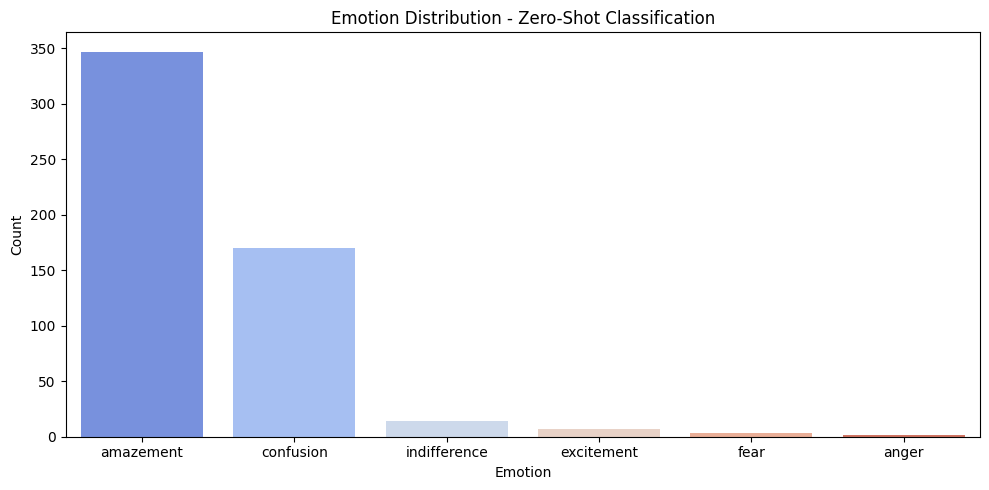

In [ ]:
# Visualization
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='zero_shot_emotion', order=df['zero_shot_emotion'].value_counts().index, palette='coolwarm')
plt.title('Emotion Distribution - Zero-Shot Classification')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 4. Sentence Embeddings + Clustering (Unsupervised Sentiment)
USentence-BERT + KMeans ‚Äî you may discover natural groupings like:

‚Äúblinking lights above house‚Äù

‚Äúloud metallic hum before craft‚Äù

‚Äúlost time and missing hours‚Äù

Not sentiment per se, but powerful for latent emotional themes.

In [ ]:
# Sentence-BERT + Clustering
!pip install -q sentence-transformers scikit-learn
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Embed descriptions
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['cleaned_description'].tolist(), show_progress_bar=True)

# KMeans Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(embeddings)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

<ipython-input-27-e8cd64984077>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cluster', palette='Accent')


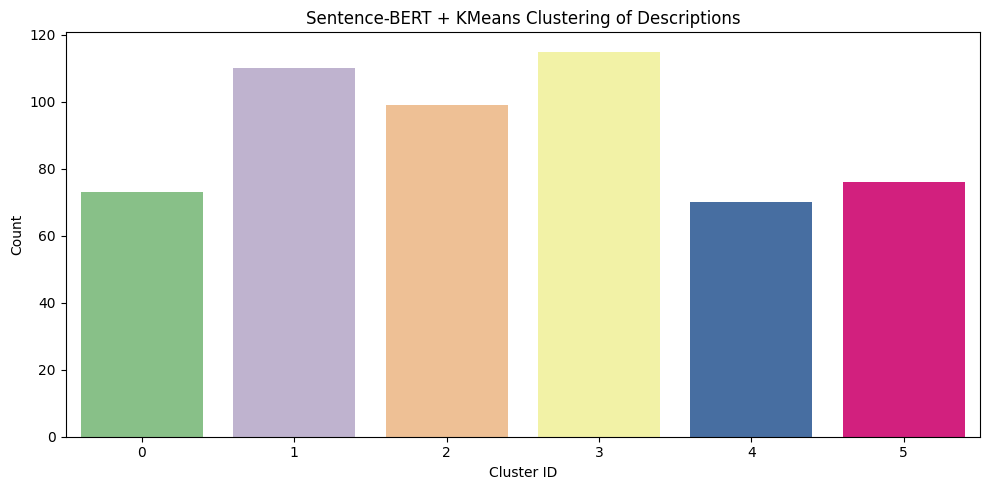


Cluster 0 Examples:
             strange circle of lights in night sky
saw a silent transparentblack triangular craft ...
                                       glowing orb

Cluster 1 Examples:
      suddenly see the object coming from the star
it was moving silently no sound nothing just a ...
bigger and bright than comet speedier than rock...

Cluster 2 Examples:
seen from the window of a flat on the fourth fl...
i was waiting for my father when i saw a disk l...
i went to get my dry cleaned bed sheets from to...

Cluster 3 Examples:
it looked like a drone i thought it was one emi...
i saw several ufo coming from down to up they f...
i was on a trip with my friends and we saw a fl...

Cluster 4 Examples:
circular object hovering on top of my village l...
unidentified flying object oversky in gurgaon i...
sophisticated aircraft like objects among cloud...

Cluster 5 Examples:
                     uap spotted over kerala india
i did not see craft i had a contact in my room ...
initial

In [ ]:
# Visualization
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cluster', palette='Accent')
plt.title('Sentence-BERT + KMeans Clustering of Descriptions')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Show examples from each cluster
for i in range(6):
    print(f"\nCluster {i} Examples:")
    print(df[df['cluster'] == i]['cleaned_description'].head(3).to_string(index=False))


# More Analysis on the Clusters

### 1. üîç Top Words / Phrases per Cluster
Show what words dominate each cluster‚Äôs descriptions.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_words_per_cluster(df, text_col='cleaned_description', cluster_col='cluster', top_n=10):
    cluster_keywords = {}
    for cluster in sorted(df[cluster_col].unique()):
        texts = df[df[cluster_col] == cluster][text_col]
        vec = CountVectorizer(stop_words='english').fit(texts)
        bag = vec.transform(texts)
        word_freq = bag.sum(axis=0).A1
        vocab = vec.get_feature_names_out()
        top_words = sorted(zip(vocab, word_freq), key=lambda x: x[1], reverse=True)[:top_n]
        cluster_keywords[cluster] = top_words
    return cluster_keywords

top_words = get_top_words_per_cluster(df)
for cluster, words in top_words.items():
    print(f"\nCluster {cluster} top words:")
    print([word for word, _ in words])



Cluster 0 top words:
['lights', 'light', 'shape', 'white', 'triangle', 'shaped', 'like', 'object', 'bright', 'sky']

Cluster 1 top words:
['moving', 'sky', 'light', 'object', 'star', 'bright', 'like', 'saw', 'seen', 'east']

Cluster 2 top words:
['object', 'like', 'flying', 'moving', 'speed', 'shaped', 'saw', 'fast', 'red', 'shape']

Cluster 3 top words:
['saw', 'sky', 'ufo', 'object', 'light', 'lights', 'like', 'flying', 'night', 'seen']

Cluster 4 top words:
['india', 'sky', 'object', 'seen', 'light', 'lights', 'bright', 'like', 'moving', 'bangalore']

Cluster 5 top words:
['ufo', 'india', 'sighting', 'time', 'seen', 'night', 'saw', 'ufos', 'city', 'sighted']


### 2. üò± Sentiment Comparison Across Clusters
Do some clusters show more fear? More amazement?


<ipython-input-30-7a63239828ab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y='vader_score', palette='coolwarm')


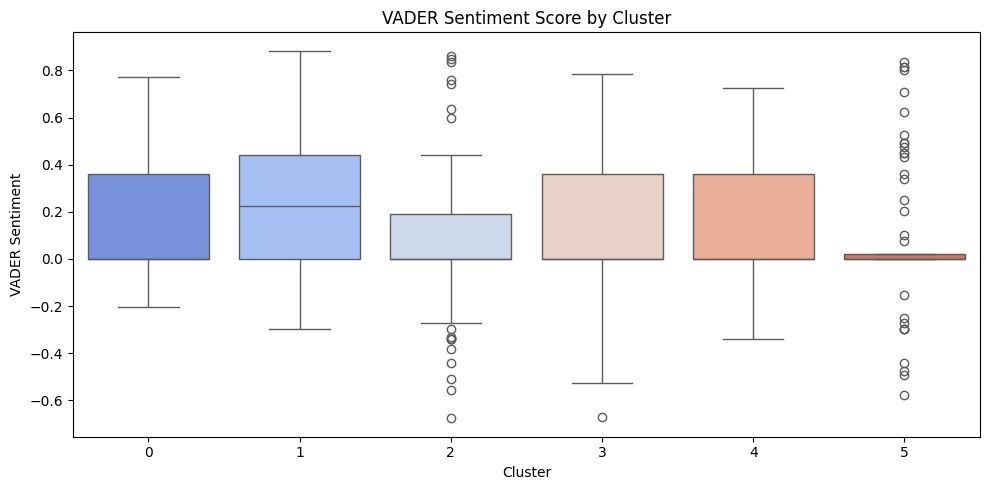

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cluster', y='vader_score', palette='coolwarm')
plt.title('VADER Sentiment Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('VADER Sentiment')
plt.tight_layout()
plt.show()


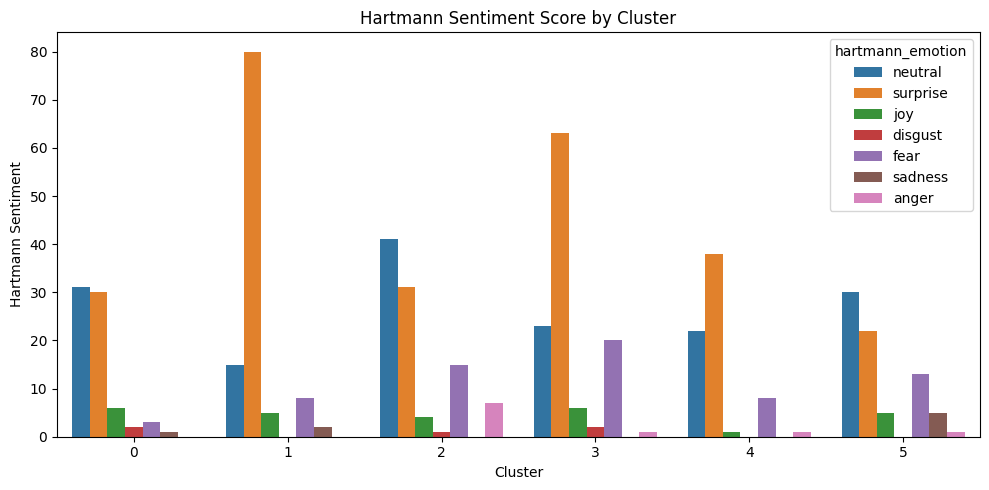

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cluster', hue='hartmann_emotion')
plt.title('Hartmann Sentiment Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Hartmann Sentiment')
plt.tight_layout()
plt.show()


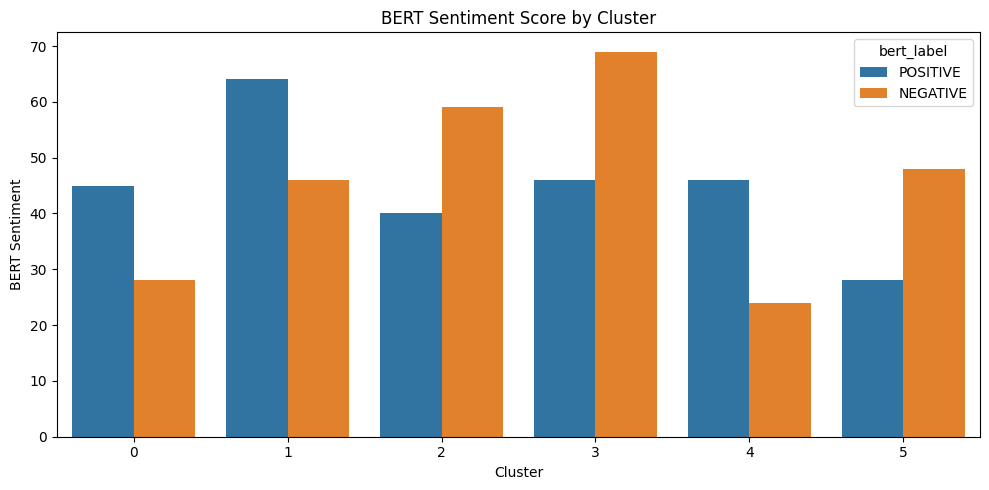

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cluster', hue='bert_label')
plt.title('BERT Sentiment Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('BERT Sentiment')
plt.tight_layout()
plt.show()


### 3. üïí Cluster by Time / Year
Do clusters relate to certain time periods?

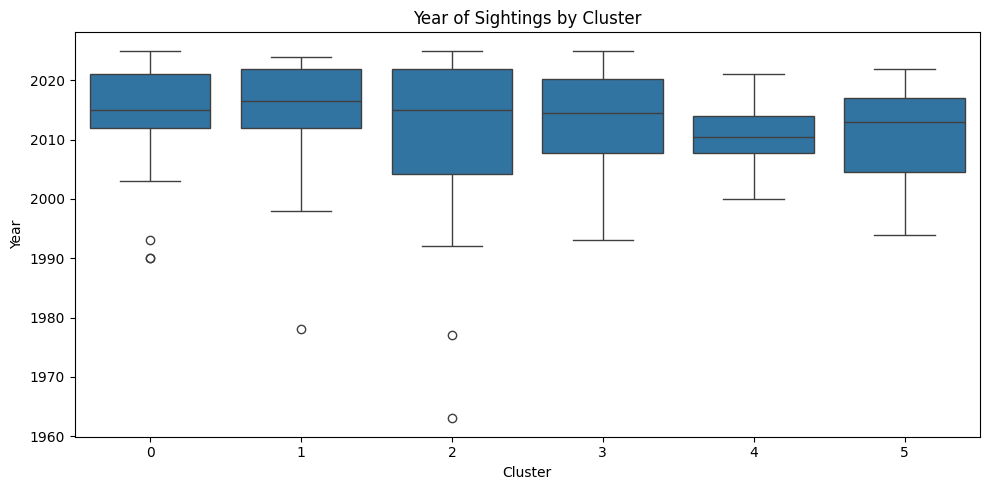

In [ ]:
df['year'] = pd.to_datetime(df['datetime'], errors='coerce').dt.year

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cluster', y='year')
plt.title('Year of Sightings by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


### 4. üõ∏ Cluster by UFO Shape
(If you have a shape column)

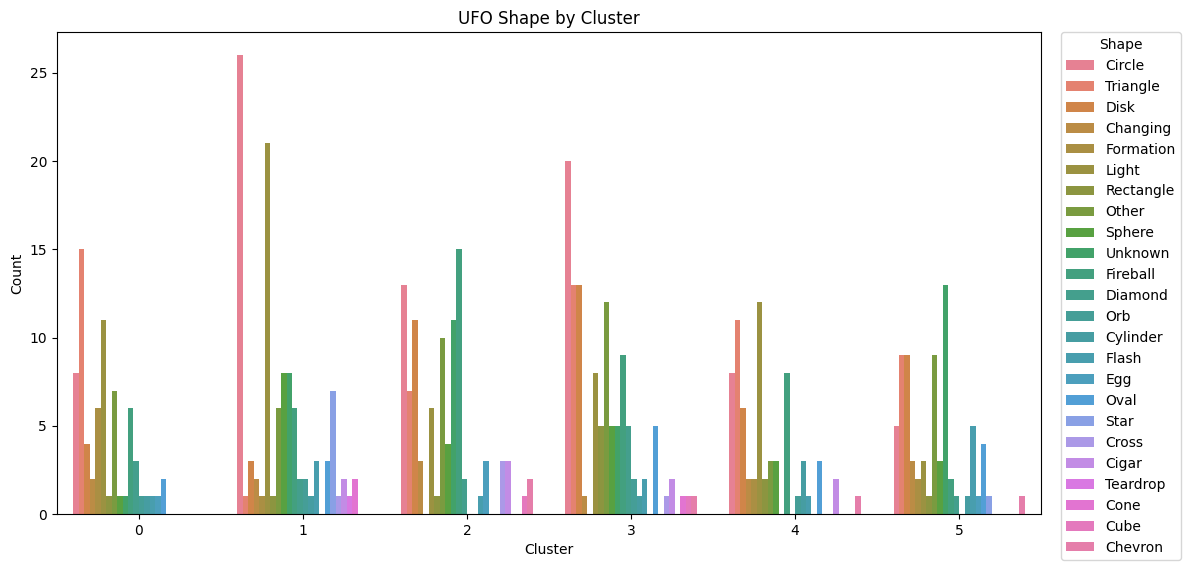

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cluster', hue='Shape')
plt.title('UFO Shape by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Move legend to the right
plt.legend(title='Shape', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


### 5. üåç Cluster Geography
(If state or country columns are available)

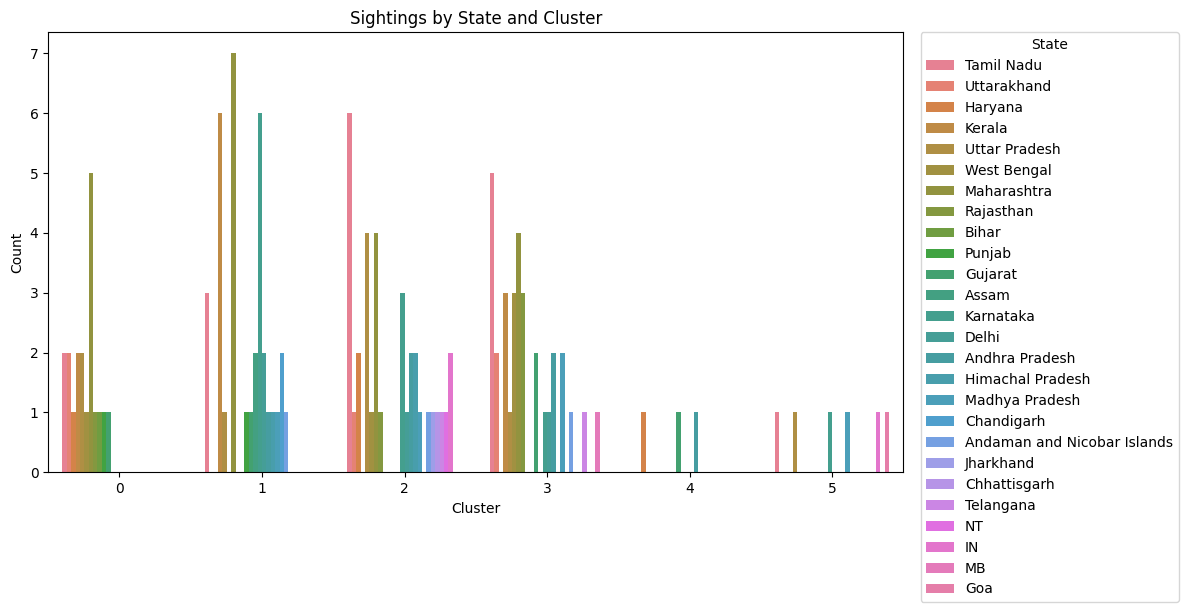

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cluster', hue='State')
plt.title('Sightings by State and Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Move legend to the side
plt.legend(title='State', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


### 6. üß† Topic Modeling Within Clusters
Use LDA or BERTopic inside each cluster to find subthemes.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

texts = df[df['cluster'] == 0]['cleaned_description']
cv = CountVectorizer(stop_words='english', max_features=500)
X = cv.fit_transform(texts)

lda = LatentDirichletAllocation(n_components=3)
lda.fit(X)

for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx + 1}:")
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic #1:
['triangle', 'object', 'formation', 'like', 'flashing', 'shape', 'bright', 'white', 'light', 'lights']
Topic #2:
['colour', 'object', 'dim', 'sky', 'shaped', 'moving', 'light', 'shape', 'triangle', 'lights']
Topic #3:
['sky', 'line', 'object', 'objects', 'white', 'blinking', 'shaped', 'light', 'lights', 'red']


# Tabulation

Step 1

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_words_per_cluster(df, text_col='cleaned_description', cluster_col='cluster', top_n=10):
    cluster_keywords = {}
    for cluster in sorted(df[cluster_col].unique()):
        texts = df[df[cluster_col] == cluster][text_col]
        vec = CountVectorizer(stop_words='english').fit(texts)
        bag = vec.transform(texts)
        word_freq = bag.sum(axis=0).A1
        vocab = vec.get_feature_names_out()
        top_words = sorted(zip(vocab, word_freq), key=lambda x: x[1], reverse=True)[:top_n]
        cluster_keywords[cluster] = top_words
    return cluster_keywords

# Apply it
top_words = get_top_words_per_cluster(df)

# Print results
for cluster, words in top_words.items():
    print(f"\nüîπ Cluster {cluster} ‚Äî Top Words:")
    print(", ".join([word for word, _ in words]))



üîπ Cluster 0 ‚Äî Top Words:
lights, light, shape, white, triangle, shaped, like, object, bright, sky

üîπ Cluster 1 ‚Äî Top Words:
moving, sky, light, object, star, bright, like, saw, seen, east

üîπ Cluster 2 ‚Äî Top Words:
object, like, flying, moving, speed, shaped, saw, fast, red, shape

üîπ Cluster 3 ‚Äî Top Words:
saw, sky, ufo, object, light, lights, like, flying, night, seen

üîπ Cluster 4 ‚Äî Top Words:
india, sky, object, seen, light, lights, bright, like, moving, bangalore

üîπ Cluster 5 ‚Äî Top Words:
ufo, india, sighting, time, seen, night, saw, ufos, city, sighted


‚úÖ Step 2 includes:
üìà Plot: Boxplot of Hartmann sentiment per cluster

üìâ Optionally: Barplot of average sentiment per cluster (for tabular reporting)

üìÑ Value Summary: A dictionary or DataFrame of cluster-wise average sentiment ‚Äî so we can include it in the table

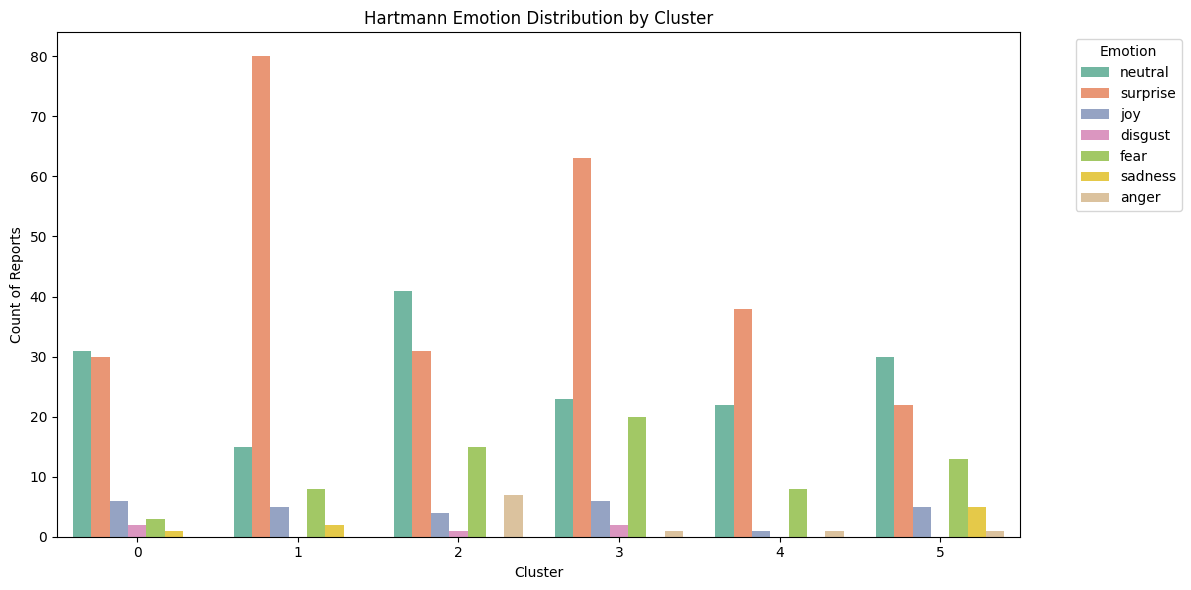

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cluster', hue='hartmann_emotion', palette='Set2')
plt.title('Hartmann Emotion Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count of Reports')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Most common emotion per cluster
dominant_emotion = (
    df.groupby('cluster')['hartmann_emotion']
    .agg(lambda x: x.value_counts().index[0])
)

print("üìÑ Dominant Hartmann Emotion per Cluster:")
print(dominant_emotion)


üìÑ Dominant Hartmann Emotion per Cluster:
cluster
0     neutral
1    surprise
2     neutral
3    surprise
4    surprise
5     neutral
Name: hartmann_emotion, dtype: object


‚úÖ Step 3: Code to Analyze Year Ranges per Cluster

In [ ]:
# Extract year from the Occurred column
df['datetime'] = pd.to_datetime(df['Occurred'], errors='coerce')
df['year'] = df['datetime'].dt.year

# üìÑ Summary: Min‚ÄìMax year per cluster
year_range = df.groupby('cluster')['year'].agg(['min', 'max', lambda x: x.mode().iloc[0]])
year_range.columns = ['year_min', 'year_max', 'most_common_year']
print("üìÑ Year Range and Most Common Year per Cluster:")
print(year_range)


üìÑ Year Range and Most Common Year per Cluster:
         year_min  year_max  most_common_year
cluster                                      
0          1990.0    2025.0            2015.0
1          1978.0    2024.0            2024.0
2          1963.0    2025.0            2015.0
3          1993.0    2025.0            2023.0
4          2000.0    2021.0            2008.0
5          1994.0    2022.0            2012.0


<ipython-input-43-d9006a3fb05a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y='year', palette='crest')


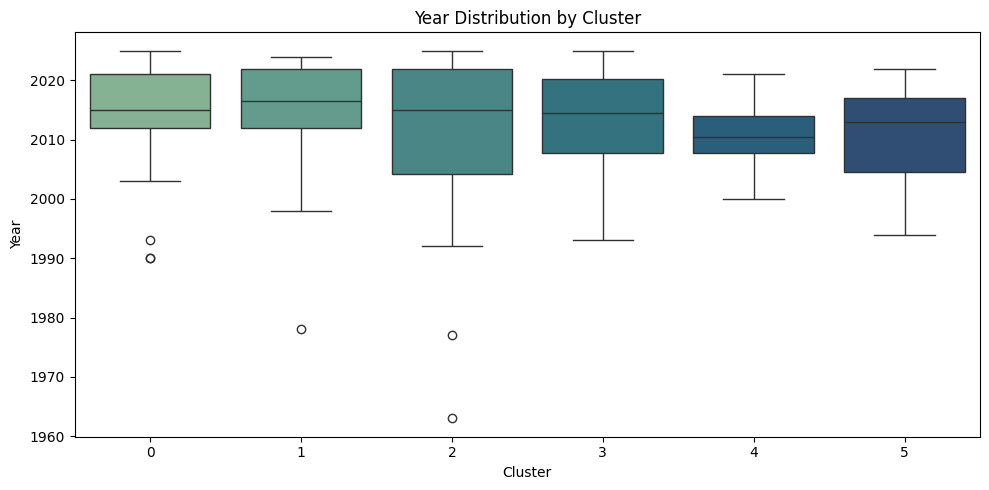

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cluster', y='year', palette='crest')
plt.title('Year Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


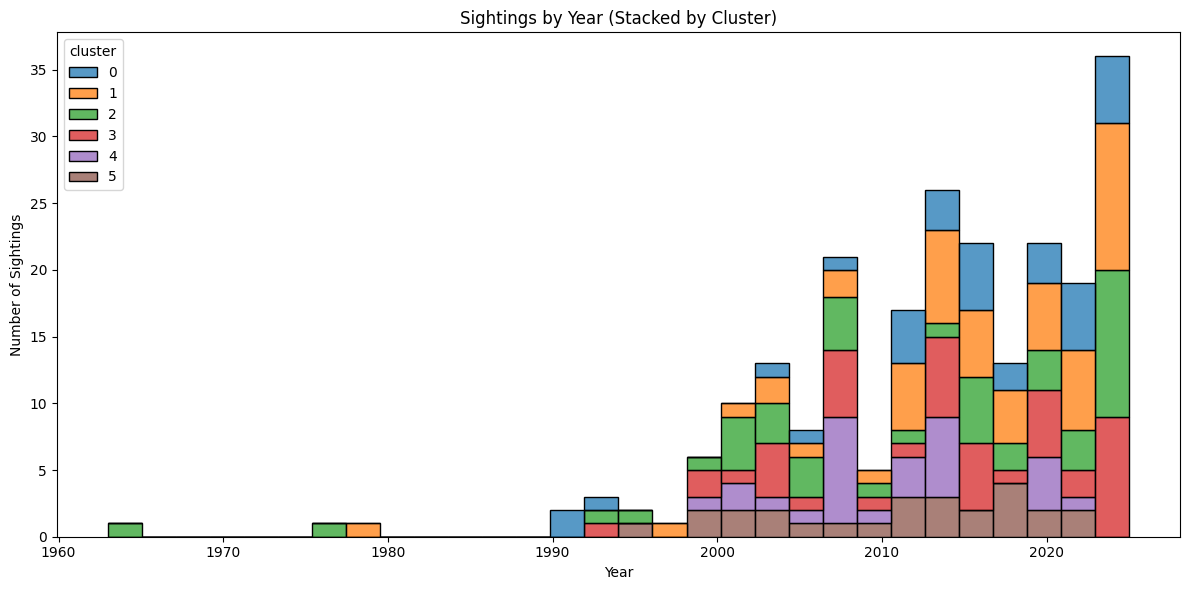

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='year', hue='cluster', multiple='stack', palette='tab10', bins=30)
plt.title('Sightings by Year (Stacked by Cluster)')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.tight_layout()
plt.show()


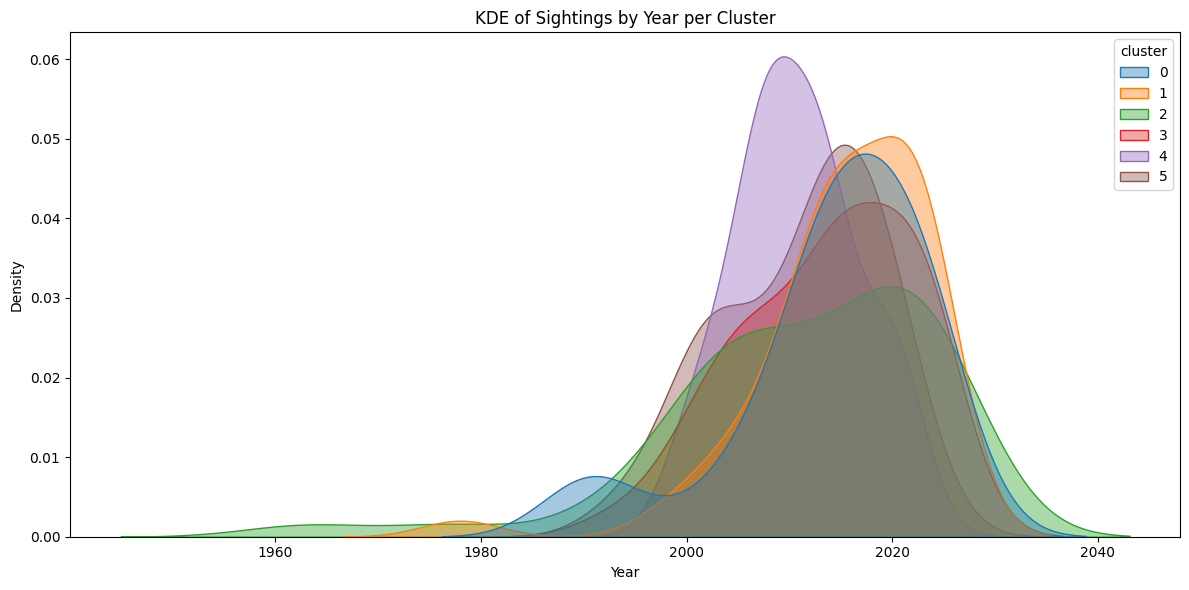

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='year', hue='cluster', common_norm=False, fill=True, palette='tab10', alpha=0.4)
plt.title('KDE of Sightings by Year per Cluster')
plt.xlabel('Year')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


‚úÖ Step 4: Most Common Shape per Cluster

In [ ]:
# Make sure shape column exists and is clean
df['Shape'] = df['Shape'].fillna('Unknown').str.lower().str.strip()

# üìÑ Summary: Most common shape per cluster
top_shapes = (
    df.groupby('cluster')['Shape']
    .agg(lambda x: x.value_counts().index[0])
)

print("üìÑ Most Common UFO Shape per Cluster:")
print(top_shapes)


üìÑ Most Common UFO Shape per Cluster:
cluster
0    triangle
1      circle
2    fireball
3      circle
4       light
5     unknown
Name: Shape, dtype: object


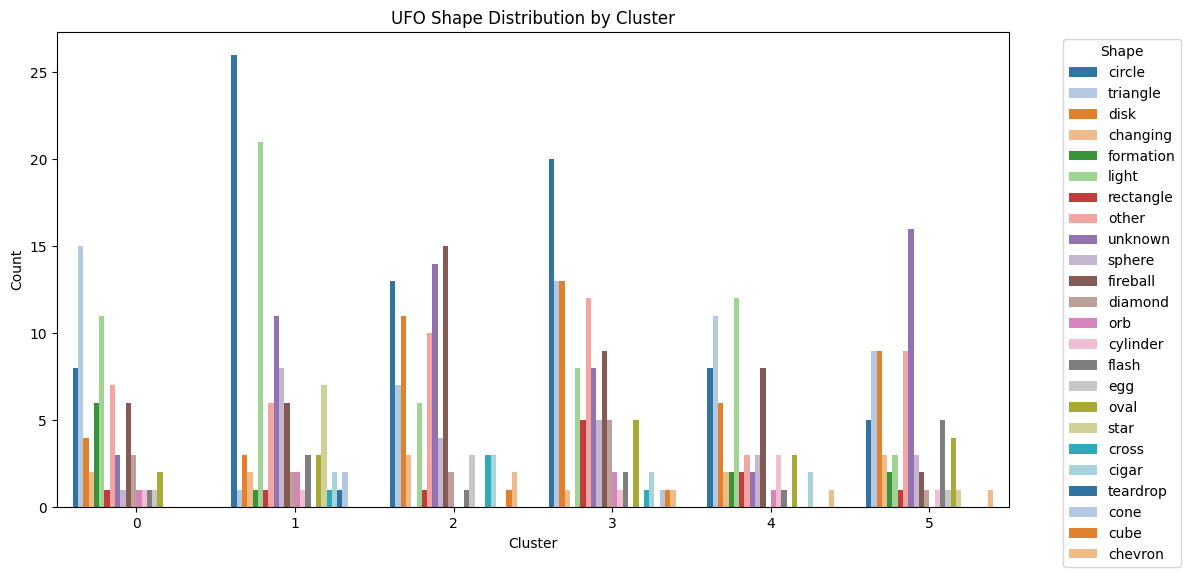

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cluster', hue='Shape', palette='tab20', order=sorted(df['cluster'].unique()))
plt.title('UFO Shape Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Shape', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Awesome ‚Äî let‚Äôs build the final Cluster Summary Table üß†üìã

We‚Äôll combine:

üÜî Cluster ID

üìù Top 5 Words

üí¨ Dominant Emotion (hartmann_emotion)

üìÖ Most Common Year

üõ∏ Most Common Shape



In [ ]:
# 1. Top words per cluster (from earlier step)
from sklearn.feature_extraction.text import CountVectorizer

def get_top_words(df, cluster_col='cluster', text_col='cleaned_description', top_n=5):
    top_words_dict = {}
    for cluster in sorted(df[cluster_col].unique()):
        texts = df[df[cluster_col] == cluster][text_col]
        vec = CountVectorizer(stop_words='english').fit(texts)
        bag = vec.transform(texts)
        freqs = bag.sum(axis=0).A1
        vocab = vec.get_feature_names_out()
        words = sorted(zip(vocab, freqs), key=lambda x: x[1], reverse=True)[:top_n]
        top_words_dict[cluster] = ", ".join([w for w, _ in words])
    return top_words_dict

# Extract cluster-level values
cluster_ids = sorted(df['cluster'].unique())
top_words = get_top_words(df)
dominant_emotions = df.groupby('cluster')['hartmann_emotion'].agg(lambda x: x.value_counts().index[0])
most_common_year = df.groupby('cluster')['year'].agg(lambda x: x.mode().iloc[0])
top_shapes = df.groupby('cluster')['Shape'].agg(lambda x: x.value_counts().index[0])

# Combine into summary DataFrame
summary_df = pd.DataFrame({
    'Cluster': cluster_ids,
    'Top Words': [top_words[c] for c in cluster_ids],
    'Dominant Emotion': dominant_emotions.values,
    'Most Common Year': most_common_year.values,
    'Most Common Shape': top_shapes.values
})

# Display and optionally save
print("üìã Cluster Summary Table:\n")
display(summary_df)

# Optional: Save to CSV
summary_df.to_csv("cluster_summary_table.csv", index=False)


üìã Cluster Summary Table:



Cluster                              Top Words Dominant Emotion  \
0        0  lights, light, shape, white, triangle          neutral   
1        1       moving, sky, light, object, star         surprise   
2        2    object, like, flying, moving, speed          neutral   
3        3           saw, sky, ufo, object, light         surprise   
4        4        india, sky, object, seen, light         surprise   
5        5       ufo, india, sighting, time, seen          neutral   

   Most Common Year Most Common Shape  
0            2015.0          triangle  
1            2024.0            circle  
2            2015.0          fireball  
3            2023.0            circle  
4            2008.0             light  
5            2012.0           unknown